In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Carregando o Conjunto de dados

In [2]:
# Definindo semente aleatória (seed) para reprodutibilidade do notebook
rnd_seed = 23
np.random.seed = rnd_seed
np.random.set_state = rnd_seed

In [3]:
df = pd.read_csv('C:/prev_notas/exams.csv')

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


## Análise Exploratória de Dados

In [7]:
# Verifica NA
df.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [8]:
# Identificar variáveis categóricas
cat_cols = [col for col in df.columns if df[col].dtype=='O']
cat_cols

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [9]:
# Identificar  variáveis numéricas
num_cols = [col for col in df.columns if df[col].dtype != 'O']
num_cols

['math score', 'reading score', 'writing score']

### Exploração das Variáveis Numéricas

<AxesSubplot:xlabel='math score', ylabel='Count'>

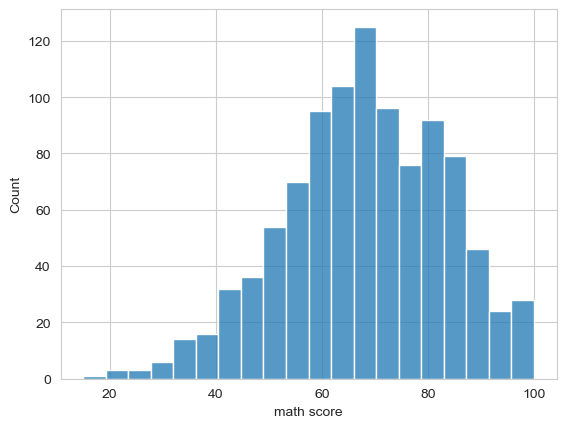

In [10]:
# Visualização da distribuição das notas de matemática
sns.histplot(data = df, x ='math score')

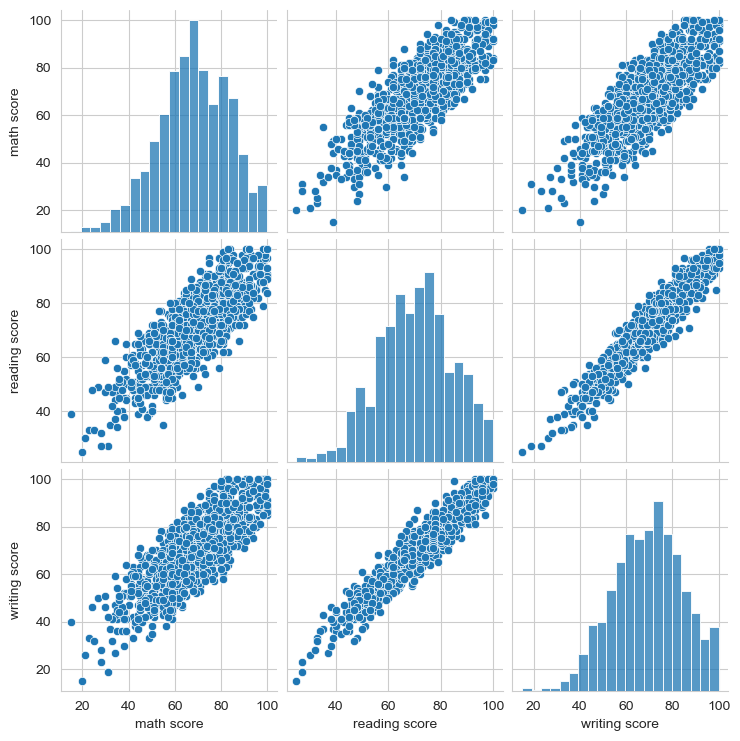

In [11]:
# Visualização das relações entre as variáveis
sns.pairplot(df)

## Exploração das Variáveis Categóricas

In [12]:
# Transformar variáveis categóticas em numéricas
df.gender.value_counts()

male      508
female    492
Name: gender, dtype: int64

In [13]:
le = LabelEncoder()

In [14]:
le.fit(df.gender)

LabelEncoder()

In [15]:
df.gender = le.transform(df.gender)

In [16]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
861,1,group C,high school,free/reduced,completed,77,80,74
748,0,group A,associate's degree,free/reduced,none,41,49,51
742,1,group B,some college,standard,none,76,70,67
47,1,group C,some college,standard,completed,80,76,68
860,1,group B,associate's degree,standard,completed,79,77,75


In [17]:
df = df.rename(columns = {'race/ethnicity': 're'})

In [18]:
df.sample(5)

,gender,re,parental level of education,lunch,test preparation course,math score,reading score,writing score
247,1,group C,high school,standard,none,88,66,73
764,0,group B,some college,standard,none,65,76,70
595,1,group C,bachelor's degree,standard,none,74,61,68
785,0,group D,associate's degree,standard,none,67,67,67
512,0,group D,associate's degree,free/reduced,none,45,61,57


In [19]:
df.re.value_counts()

group C    323
group D    257
group B    198
group E    143
group A     79
Name: re, dtype: int64

In [20]:
le.fit(df.re)

LabelEncoder()

In [21]:
df.re = le.transform(df.re)

In [22]:
df.sample(5)

,gender,re,parental level of education,lunch,test preparation course,math score,reading score,writing score
241,0,3,some high school,free/reduced,none,60,69,70
348,1,1,some college,free/reduced,none,78,68,70
601,0,3,some high school,standard,none,53,55,57
621,0,1,high school,standard,completed,81,89,88
297,1,3,high school,standard,none,60,54,47


In [23]:
df = df.rename(columns = {'parental level of education': 'ple'})

In [24]:
df.sample(5)

,gender,re,ple,lunch,test preparation course,math score,reading score,writing score
737,1,3,high school,standard,completed,78,76,80
905,1,1,associate's degree,standard,none,73,54,57
556,1,0,associate's degree,free/reduced,completed,56,60,63
456,0,3,associate's degree,standard,none,84,90,90
66,1,2,high school,free/reduced,none,75,77,66


In [25]:
df.ple.value_counts()

some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: ple, dtype: int64

In [26]:
df = df.rename(columns = {'test preparation course': 'tpc'})

In [27]:
# Aplicando One-Hot Encoding
for cat in ['ple', 
            'lunch', 
            'tpc']:
    onehots = pd.get_dummies(df[cat], prefix = cat)
    df = df.join(onehots)

In [28]:
df.sample(5)

,gender,re,ple,lunch,tpc,math score,reading score,writing score,ple_associate's degree,ple_bachelor's degree,ple_high school,ple_master's degree,ple_some college,ple_some high school,lunch_free/reduced,lunch_standard,tpc_completed,tpc_none
703,0,4,some college,free/reduced,none,84,88,82,0,0,0,0,1,0,1,0,0,1
121,1,3,master's degree,standard,none,82,84,81,0,0,0,1,0,0,0,1,0,1
872,0,4,some college,standard,none,62,65,65,0,0,0,0,1,0,0,1,0,1
259,1,2,some college,standard,none,86,82,72,0,0,0,0,1,0,0,1,0,1
713,1,2,master's degree,standard,none,93,78,77,0,0,0,1,0,0,0,1,0,1


In [29]:
# Retirada de colunas após encoding
df = df.drop(columns = ['ple', 
            'lunch', 
            'tpc'])

In [30]:
df.sample(5)

,gender,re,math score,reading score,writing score,ple_associate's degree,ple_bachelor's degree,ple_high school,ple_master's degree,ple_some college,ple_some high school,lunch_free/reduced,lunch_standard,tpc_completed,tpc_none
662,0,2,80,84,81,0,0,1,0,0,0,0,1,0,1
679,0,2,58,80,76,0,0,0,0,0,1,1,0,1,0
868,1,4,92,80,78,0,0,0,0,0,1,0,1,0,1
720,1,3,55,35,43,0,1,0,0,0,0,0,1,0,1
623,1,1,71,63,61,0,0,1,0,0,0,0,1,0,1


## Verificando a correlação entre as variáveis

In [31]:
# Correlação
df.corr()

,gender,re,math score,reading score,writing score,ple_associate's degree,ple_bachelor's degree,ple_high school,ple_master's degree,ple_some college,ple_some high school,lunch_free/reduced,lunch_standard,tpc_completed,tpc_none
gender,1.000000,0.048978,0.195992,-0.215775,-0.281707,-0.003137,-0.002218,-0.049760,0.029618,0.020189,0.016163,-0.015708,0.015708,-0.032641,0.032641
re,0.048978,1.000000,0.235162,0.153572,0.166671,-0.030698,-0.004663,-0.028104,0.026474,0.027498,0.018100,-0.006608,0.006608,0.004918,-0.004918
math score,0.195992,0.235162,1.000000,0.811767,0.790055,0.084294,0.046216,-0.083384,0.060091,0.029357,-0.109902,-0.372465,0.372465,0.119925,-0.119925
reading score,-0.215775,0.153572,0.811767,1.000000,0.948909,0.081322,0.034908,-0.043007,0.032136,0.021337,-0.113090,-0.241319,0.241319,0.223132,-0.223132
writing score,-0.281707,0.166671,0.790055,0.948909,1.000000,0.097727,0.071308,-0.082514,0.049422,0.011920,-0.118767,-0.234400,0.234400,0.321520,-0.321520
ple_associate's degree,-0.003137,-0.030698,0.084294,0.081322,0.097727,1.000000,-0.173397,-0.264937,-0.144151,-0.271989,-0.234771,0.013830,-0.013830,0.009528,-0.009528
ple_bachelor's degree,-0.002218,-0.004663,0.046216,0.034908,0.071308,-0.173397,1.000000,-0.179253,-0.097531,-0.184025,-0.158844,0.008952,-0.008952,0.026644,-0.026644
ple_high school,-0.049760,-0.028104,-0.083384,-0.043007,-0.082514,-0.264937,-0.179253,1.000000,-0.149020,-0.281176,-0.242701,0.030317,-0.030317,-0.010043,0.010043
ple_master's degree,0.029618,0.026474,0.060091,0.032136,0.049422,-0.144151,-0.097531,-0.149020,1.000000,-0.152986,-0.132052,-0.004007,0.004007,-0.038363,0.038363
ple_some college,0.020189,0.027498,0.029357,0.021337,0.011920,-0.271989,-0.184025,-0.281176,-0.152986,1.000000,-0.249161,-0.010937,0.010937,0.004766,-0.004766


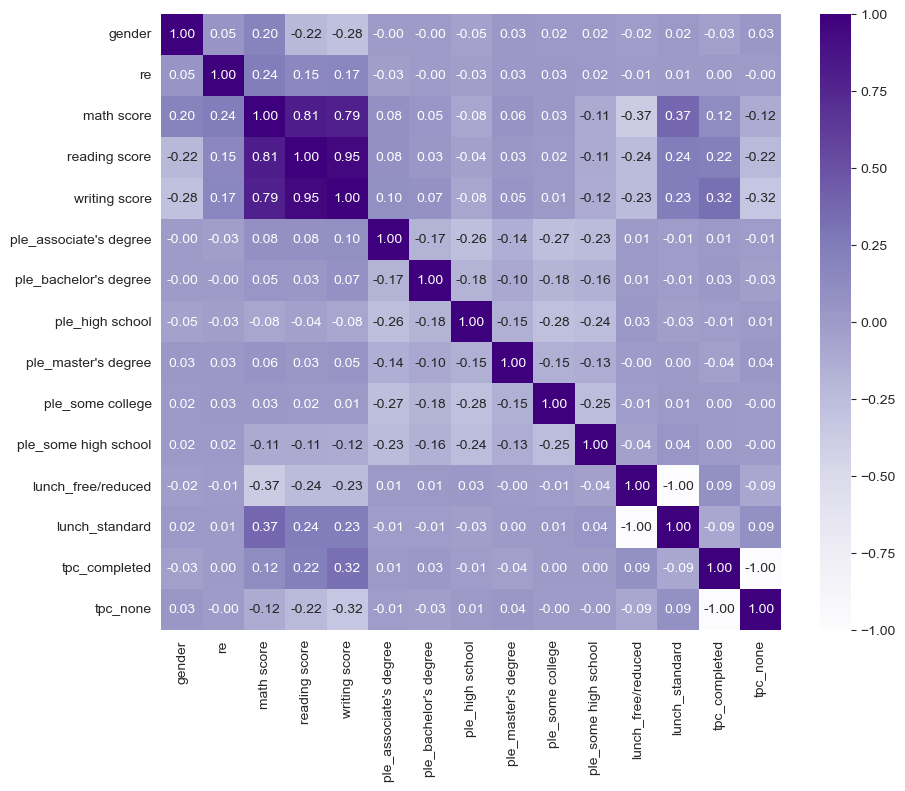

In [32]:
# Mapa de correlação 
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), cmap = 'Purples', annot = True, fmt = '.2f');

In [33]:
df.columns

Index(['gender', 're', 'math score', 'reading score', 'writing score',
       'ple_associate's degree', 'ple_bachelor's degree', 'ple_high school',
       'ple_master's degree', 'ple_some college', 'ple_some high school',
       'lunch_free/reduced', 'lunch_standard', 'tpc_completed', 'tpc_none'],
      dtype='object')

### Verificando Valores Ausentes e Registros Duplicados

In [34]:
# Verificando valores ausentes
df[df.isnull().values]

,gender,re,math score,reading score,writing score,ple_associate's degree,ple_bachelor's degree,ple_high school,ple_master's degree,ple_some college,ple_some high school,lunch_free/reduced,lunch_standard,tpc_completed,tpc_none


In [35]:
# Verificando registros duplicados (complete cases)
df[df.duplicated(keep = False)]

,gender,re,math score,reading score,writing score,ple_associate's degree,ple_bachelor's degree,ple_high school,ple_master's degree,ple_some college,ple_some high school,lunch_free/reduced,lunch_standard,tpc_completed,tpc_none


### Renomear Colunas

In [36]:
df = df.rename(columns = {"ple_associate's degree": 'ple_associate'})

In [37]:
df = df.rename(columns = {"ple_bachelor's degree": 'ple_bachelor'})

In [38]:
df = df.rename(columns = {"ple_master's degree": 'ple_master'})

# Construção de Modelos de Machine Learning

In [39]:
# Variáveis de entrada (variáveis preditoras)
X = df[['gender', 're', 'reading score', 'writing score', 'ple_associate', 'ple_bachelor', 'ple_high school', 'ple_master',
       'ple_some college', 'ple_some high school', 'lunch_free/reduced',
       'lunch_standard', 'tpc_completed', 'tpc_none']]

In [40]:
# Variável alvo (target)
y = df['math score']

In [41]:
# Divisão em dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [42]:
len(X_treino)

700

In [43]:
len(X_teste)

300

In [44]:
# Criação de data frame para inserir informações dos modelos
index = ['modelo_v1', 'modelo_v2', 'modelo_v3', 'modelo_v4', 'modelo_v5', 'modelo_v6', 'modelo_v7', 'modelo_v8']
columns = ['MAE', 'MSE', 'RMSE', 'R2', 'EX_VAR']
df_modelos = pd.DataFrame(index=index, columns=columns)


In [45]:
# Cria o modelo
modelo_v1 = LinearRegression()

In [46]:
# Treinamento
modelo_v1.fit(X_treino, y_treino)

LinearRegression()

In [47]:
print('Coeficientes: \n', modelo_v1.coef_)

Coeficientes: 
 [12.87963706  0.65618401  0.27267543  0.67523062 -0.04142883  0.06507179
  0.46196369 -0.16858242  0.11364249 -0.43066672 -2.58003132  2.58003132
 -2.00612597  2.00612597]


In [48]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
gender,12.879637
re,0.656184
reading score,0.272675
writing score,0.675231
ple_associate,-0.041429
ple_bachelor,0.065072
ple_high school,0.461964
ple_master,-0.168582
ple_some college,0.113642
ple_some high school,-0.430667


In [49]:
# Previsões com dados de teste
pred_v1 = modelo_v1.predict(X_teste)

In [50]:
# Imprime as 10 primeiras previsões
pred_v1[:10]

array([87.59644172, 44.09367135, 86.55997396, 54.92138332, 56.69474316,
       74.40114866, 50.97756382, 37.62578903, 72.95760498, 70.5605245 ])

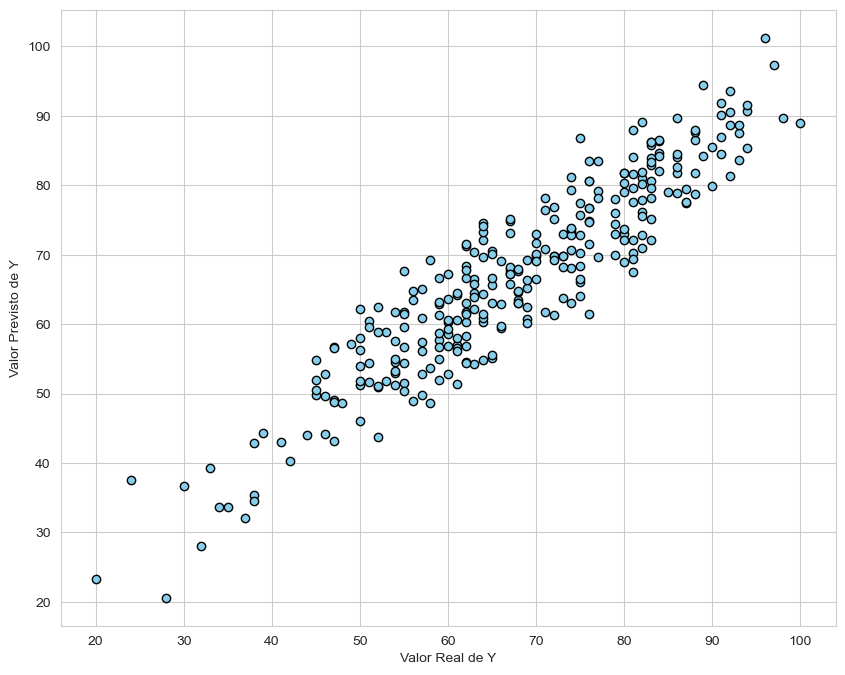

In [51]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v1, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [52]:
# MAE - Erro Médio Absoluto
mean_absolute_error(y_teste, pred_v1)

4.5555529349924875

In [53]:
# Inserir o valor de MAE para o modelo_v1 no dataframe
df_modelos.loc['modelo_v1', 'MAE'] = mean_absolute_error(y_teste, pred_v1)

In [54]:
# MSE
mean_squared_error(y_teste, pred_v1)

32.239112941435494

In [55]:
# Inserir o valor de MSE para o modelo_v1 no dataframe
df_modelos.loc['modelo_v1', 'MSE'] = mean_squared_error(y_teste, pred_v1)

In [56]:
# RMSE - Raiz quadrada do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, pred_v1))

5.677949712830811

In [57]:
# Inserir o valor de RMSE para o modelo_v1 no dataframe
df_modelos.loc['modelo_v1', 'RMSE'] = np.sqrt(mean_squared_error(y_teste, pred_v1))

In [58]:
# Coeficiente R2
r2_score(y_teste, pred_v1)

0.8550297910220523

In [59]:
# Inserir o valor de R2 para o modelo_v1 no dataframe
df_modelos.loc['modelo_v1', 'R2'] = r2_score(y_teste, pred_v1)

In [60]:
# Variância Explicada
explained_variance_score(y_teste, pred_v1)

0.8568916631858265

In [61]:
# Inserir o valor de EX_VAR para o modelo_v1 no dataframe
df_modelos.loc['modelo_v1', 'EX_VAR'] = mean_absolute_error(y_teste, pred_v1)

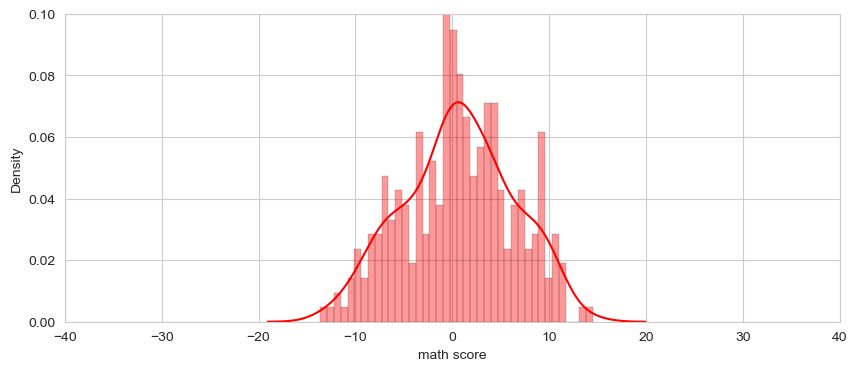

In [62]:
# Plot resíduos
plt.figure(figsize = (10,4))
ax = sns.distplot((y_teste - pred_v1), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.1));

In [63]:
# Modelo 2
modelo_v2 = Ridge(alpha = 1.0)

In [64]:
# Treinamento
modelo_v2.fit(X_treino, y_treino)

Ridge()

In [65]:
print('Coeficientes: \n', modelo_v2.coef_)

Coeficientes: 
 [12.79073596  0.66018821  0.27576319  0.67127755 -0.03785702  0.06628688
  0.44798163 -0.15362745  0.10855568 -0.43133971 -2.57654193  2.57654193
 -1.99128135  1.99128135]


In [66]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v2.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
gender,12.790736
re,0.660188
reading score,0.275763
writing score,0.671278
ple_associate,-0.037857
ple_bachelor,0.066287
ple_high school,0.447982
ple_master,-0.153627
ple_some college,0.108556
ple_some high school,-0.431340


In [67]:
# Previsões com dados de teste
pred_v2 = modelo_v2.predict(X_teste)
pred_v2[:10]

array([87.55653814, 44.16597159, 86.50957379, 54.90458238, 56.7244908 ,
       74.36550005, 51.04437485, 37.67501419, 72.99401499, 70.59036095])

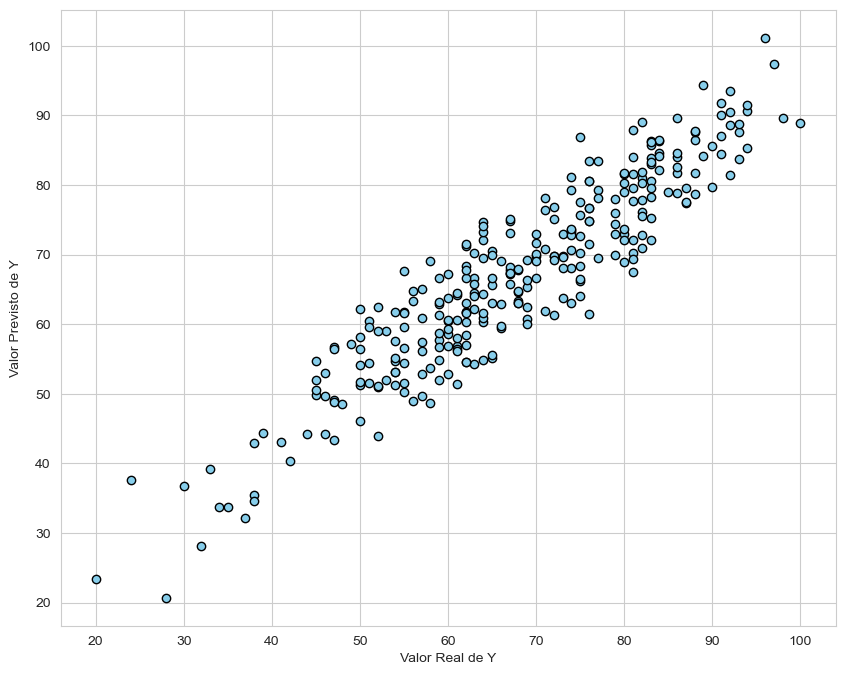

In [68]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v2, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [69]:
# MAE
mean_absolute_error(y_teste, pred_v2)

4.555320835517914

In [70]:
# Inserir o valor de MAE para o modelo_v2 no dataframe
df_modelos.loc['modelo_v2', 'MAE'] = mean_absolute_error(y_teste, pred_v2)

In [71]:
# MSE
mean_squared_error(y_teste, pred_v2)

32.238960160129885

In [72]:
# Inserir o valor de MSE para o modelo_v2 no dataframe
df_modelos.loc['modelo_v2', 'MSE'] = mean_squared_error(y_teste, pred_v2)

In [73]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v2))

5.677936258899873

In [74]:
# Inserir o valor de RMSE para o modelo_v2 no dataframe
df_modelos.loc['modelo_v2', 'RMSE'] = np.sqrt(mean_squared_error(y_teste, pred_v2))

In [75]:
# Coeficiente R2
r2_score(y_teste, pred_v2)

0.8550304780365445

In [76]:
# Inserir o valor de R2 para o modelo_v2 no dataframe
df_modelos.loc['modelo_v2', 'R2'] = r2_score(y_teste, pred_v2)

In [77]:
# Variância Explicada
explained_variance_score(y_teste, pred_v2)

0.8568971624303896

In [78]:
# Inserir o valor de EX_VAR para o modelo_v2 no dataframe
df_modelos.loc['modelo_v2', 'EX_VAR'] = mean_absolute_error(y_teste, pred_v2)

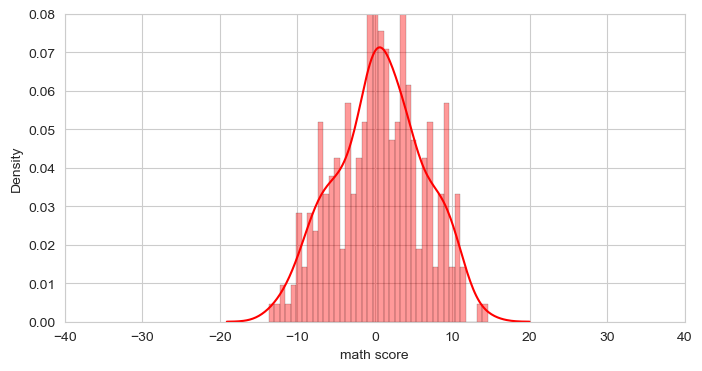

In [79]:
# Plot resíduos
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v2), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.08));

In [80]:
# Modelo 3
modelo_v3 = Lasso(alpha = 1.0)

In [81]:
# Treinamento
modelo_v3.fit(X_treino, y_treino)

Lasso()

In [82]:
print('Coeficientes: \n', modelo_v3.coef_)

Coeficientes: 
 [ 8.14185772e+00  9.59873990e-02  5.20657961e-01  3.98073281e-01
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -1.34247086e+00  5.86360053e-15
 -0.00000000e+00  0.00000000e+00]


In [83]:
# Coeficientes
df_coef = pd.DataFrame(modelo_v3.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
gender,8.141858e+00
re,9.598740e-02
reading score,5.206580e-01
writing score,3.980733e-01
ple_associate,0.000000e+00
ple_bachelor,0.000000e+00
ple_high school,-0.000000e+00
ple_master,0.000000e+00
ple_some college,-0.000000e+00
ple_some high school,-0.000000e+00


In [84]:
# Previsões com dados de teste
pred_v3 = modelo_v3.predict(X_teste)
pred_v3[:10]

array([83.11274983, 47.51906595, 80.90753331, 52.78214527, 59.13854183,
       74.90201612, 58.00123851, 41.70924553, 75.79828886, 68.50442451])

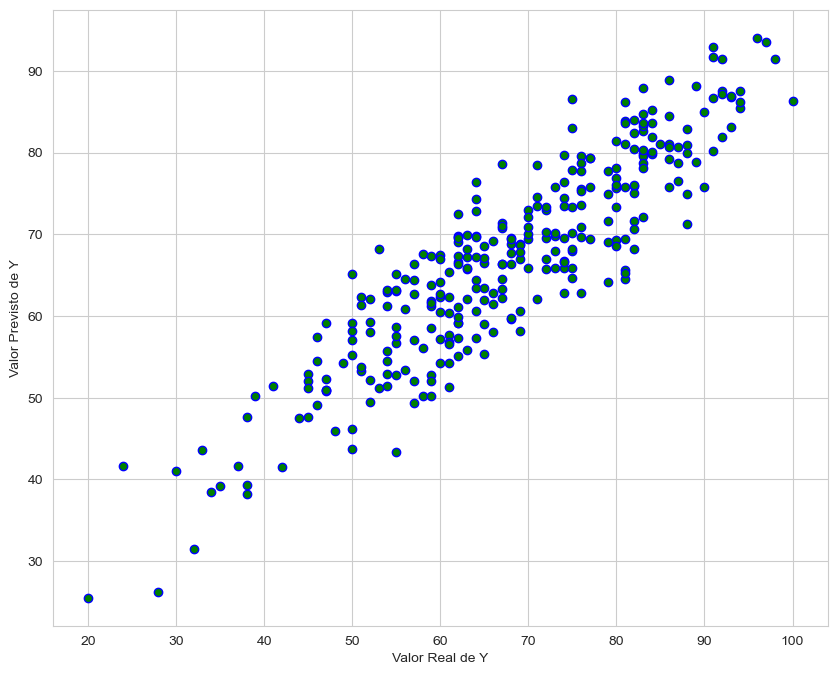

In [85]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v3, color = 'green', edgecolors = 'blue')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [86]:
# MAE
mean_absolute_error(y_teste, pred_v3)

5.33410300754125

In [87]:
# Inserir o valor de MAE para o modelo_v3 no dataframe
df_modelos.loc['modelo_v3', 'MAE'] = mean_absolute_error(y_teste, pred_v3)

In [88]:
# MSE
mean_squared_error(y_teste, pred_v3)

42.96998155660307

In [89]:
# Inserir o valor de MSE para o modelo_v3 no dataframe
df_modelos.loc['modelo_v3', 'MSE'] = mean_squared_error(y_teste, pred_v3)

In [90]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v3))

6.555149239842146

In [91]:
# Inserir o valor de RMSE para o modelo_v3 no dataframe
df_modelos.loc['modelo_v3', 'RMSE'] = np.sqrt(mean_squared_error(y_teste, pred_v3))

In [92]:
# Coeficiente R2
r2_score(y_teste, pred_v3)

0.8067760977991124

In [93]:
# Inserir o valor de R2 para o modelo_v3 no dataframe
df_modelos.loc['modelo_v3', 'R2'] = r2_score(y_teste, pred_v3)

In [94]:
# Variância Explicada
explained_variance_score(y_teste, pred_v3)

0.8086940900212327

In [95]:
# Inserir o valor de EX_VAR para o modelo_v3 no dataframe
df_modelos.loc['modelo_v3', 'EX_VAR'] = mean_absolute_error(y_teste, pred_v3)

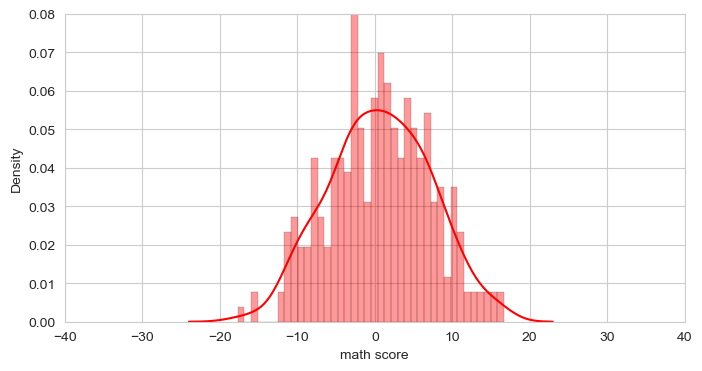

In [96]:
# Plot resíduos
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v3), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.08));

In [97]:
# Treinamento de um modelo de árvore de decisão
modelo_v4 = DecisionTreeRegressor()

In [98]:
modelo_v4.fit(X_treino, y_treino)

DecisionTreeRegressor()

In [99]:
# Previsões com dados de teste
pred_v4 = modelo_v4.predict(X_teste)
pred_v4[:10]

array([87., 57., 98., 55., 59., 65., 55., 36., 69., 71.])

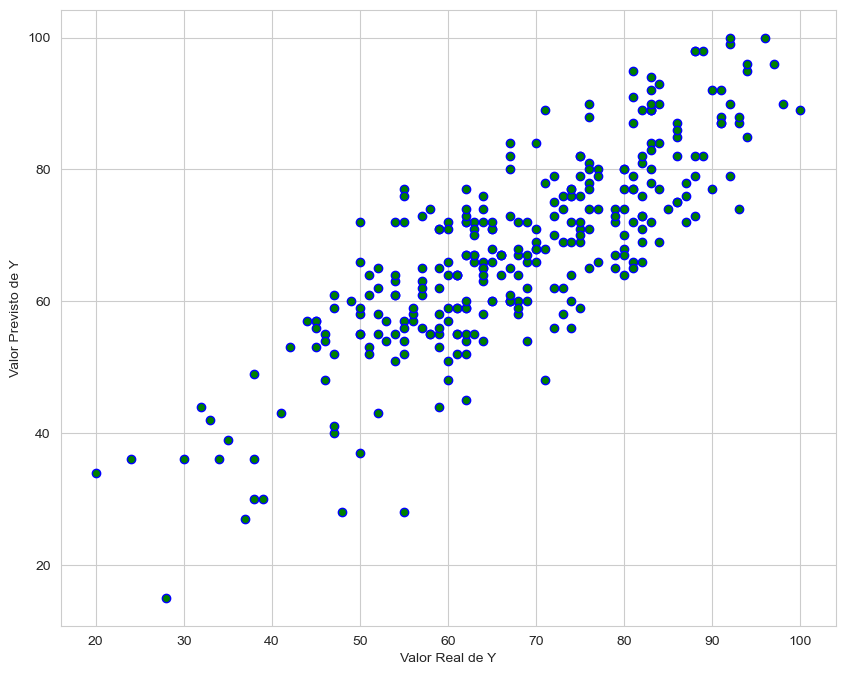

In [100]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v4, color = 'green', edgecolors = 'blue')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [101]:
# MAE
mean_absolute_error(y_teste, pred_v4)

7.19

In [102]:
# Inserir o valor de MAE para o modelo_v4 no dataframe
df_modelos.loc['modelo_v4', 'MAE'] = mean_absolute_error(y_teste, pred_v4)

In [103]:
# MSE
mean_squared_error(y_teste, pred_v4)

78.12333333333333

In [104]:
# Inserir o valor de MSE para o modelo_v4 no dataframe
df_modelos.loc['modelo_v4', 'MSE'] = mean_squared_error(y_teste, pred_v4)

In [105]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v4))

8.83874048342485

In [106]:
# Inserir o valor de RMSE para o modelo_v4 no dataframe
df_modelos.loc['modelo_v4', 'RMSE'] = np.sqrt(mean_squared_error(y_teste, pred_v4))

In [107]:
# Coeficiente R2
r2_score(y_teste, pred_v4)

0.6487013777345294

In [108]:
# Inserir o valor de R2 para o modelo_v4 no dataframe
df_modelos.loc['modelo_v4', 'R2'] = r2_score(y_teste, pred_v4)

In [109]:
# Variância Explicada
explained_variance_score(y_teste, pred_v4)

0.648701827406359

In [110]:
# Inserir o valor de EX_VAR para o modelo_v4 no dataframe
df_modelos.loc['modelo_v4', 'EX_VAR'] = mean_absolute_error(y_teste, pred_v4)

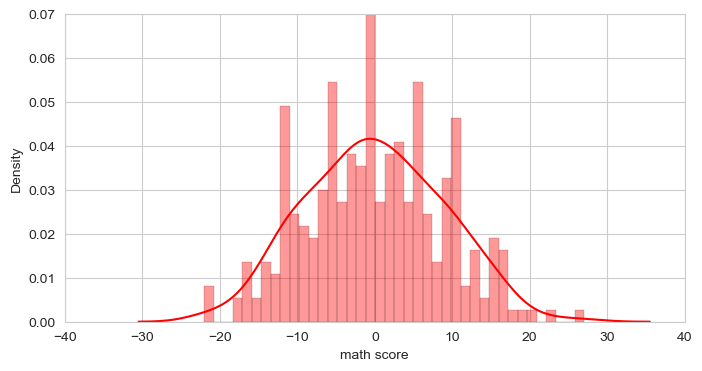

In [111]:
# Plot resíduos
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v4), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.07));

In [112]:
# Extract the two variables of interest from the DataFrame
X = df[['reading score', 'writing score']]

# Calculate the VIF for each variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Print the results
print(vif)

   VIF Factor       features
0  221.380121  reading score
1  221.380121  writing score


In [113]:
# O alto valor VIF entre as variáveis writing score e reading score mostra que temos um problema de multicolinearidade.
# Esse problema será tratado através da remoção da variável writing score, pois, a mesma apresenta uma correlação ligeiramente menor com a variável alvo.
df = df.drop('writing score', axis=1)

In [114]:
df.sample(5)

,gender,re,math score,reading score,ple_associate,ple_bachelor,ple_high school,ple_master,ple_some college,ple_some high school,lunch_free/reduced,lunch_standard,tpc_completed,tpc_none
58,0,2,79,86,0,1,0,0,0,0,0,1,0,1
138,0,3,50,66,0,0,0,0,1,0,1,0,0,1
364,1,1,58,57,0,0,0,0,1,0,1,0,1,0
315,0,3,71,74,0,0,0,0,1,0,0,1,0,1
966,1,3,85,81,0,0,1,0,0,0,0,1,0,1


In [115]:
# Variáveis de entrada (variáveis preditoras)
X = df[['gender', 're', 'reading score', 'ple_associate', 'ple_bachelor', 'ple_high school', 'ple_master',
       'ple_some college', 'ple_some high school', 'lunch_free/reduced',
       'lunch_standard', 'tpc_completed', 'tpc_none']]

In [116]:
# Variável alvo (target)
y = df['math score']

In [117]:
# Divisão em dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [118]:
len(X_treino)

700

In [119]:
len(X_teste)

300

In [120]:
# Modelo 5
modelo_v5 = LinearRegression()

In [121]:
# Treinamento
modelo_v5.fit(X_treino, y_treino)

LinearRegression()

In [122]:
print('Coeficientes: \n', modelo_v5.coef_)

Coeficientes: 
 [10.93220454  0.93603767  0.90614693  0.55763008  1.01682287 -0.74018182
  0.56497192 -0.34754751 -1.05169554 -2.84002453  2.84002453 -0.78020399
  0.78020399]


In [123]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v5.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
gender,10.932205
re,0.936038
reading score,0.906147
ple_associate,0.557630
ple_bachelor,1.016823
ple_high school,-0.740182
ple_master,0.564972
ple_some college,-0.347548
ple_some high school,-1.051696
lunch_free/reduced,-2.840025


In [124]:
# Previsões com dados de teste
pred_v5 = modelo_v5.predict(X_teste)
pred_v5[:10]

array([90.7398364 , 49.5035971 , 86.60173604, 58.42053953, 55.06860644,
       74.72087588, 52.05767882, 37.82192396, 74.04240288, 68.39683778])

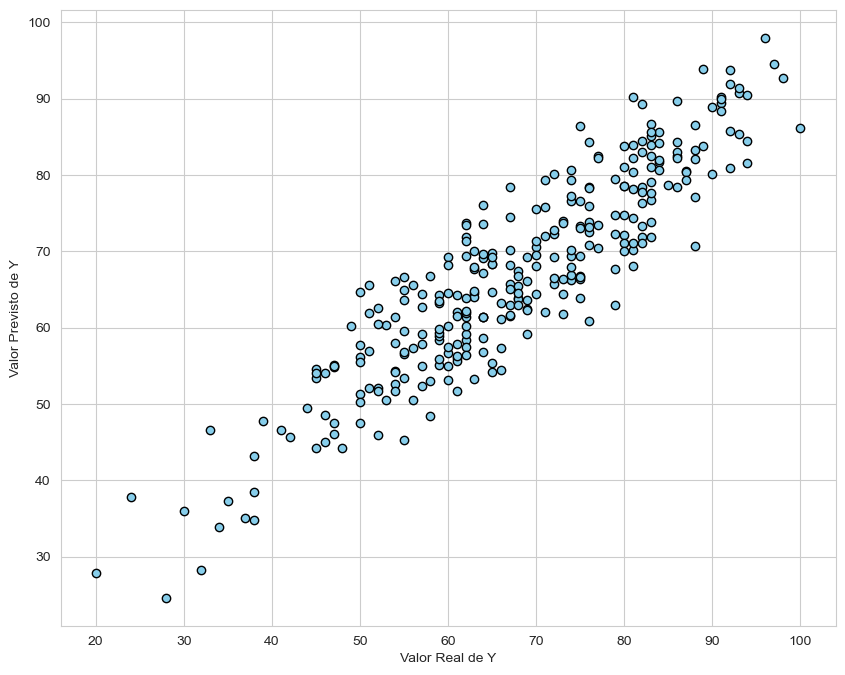

In [125]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v5, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [126]:
# MAE - Erro Médio Absoluto
mean_absolute_error(y_teste, pred_v5)

5.087263932206474

In [127]:
# Inserir o valor de MAE para o modelo_v5 no dataframe
df_modelos.loc['modelo_v5', 'MAE'] = mean_absolute_error(y_teste, pred_v5)

In [128]:
# RMSE - Raiz quadrada do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, pred_v5))

6.282744647417099

In [129]:
# Inserir o valor de RMSE para o modelo_v5 no dataframe
df_modelos.loc['modelo_v5', 'RMSE'] = np.sqrt(mean_squared_error(y_teste, pred_v5))

In [130]:
# MSE
mean_squared_error(y_teste, pred_v5)

39.4728803046482

In [131]:
# Inserir o valor de MSE para o modelo_v5 no dataframe
df_modelos.loc['modelo_v5', 'MSE'] = mean_squared_error(y_teste, pred_v5)

In [132]:
# Coeficiente R2
r2_score(y_teste, pred_v5)

0.8225015769782045

In [133]:
# Inserir o valor de R2 para o modelo_v5 no dataframe
df_modelos.loc['modelo_v5', 'R2'] = r2_score(y_teste, pred_v5)

In [134]:
# Variância Explicada
explained_variance_score(y_teste, pred_v5)

0.8242320967484983

In [135]:
# Inserir o valor de EX_VAR para o modelo_v5 no dataframe
df_modelos.loc['modelo_v5', 'EX_VAR'] = mean_absolute_error(y_teste, pred_v5)

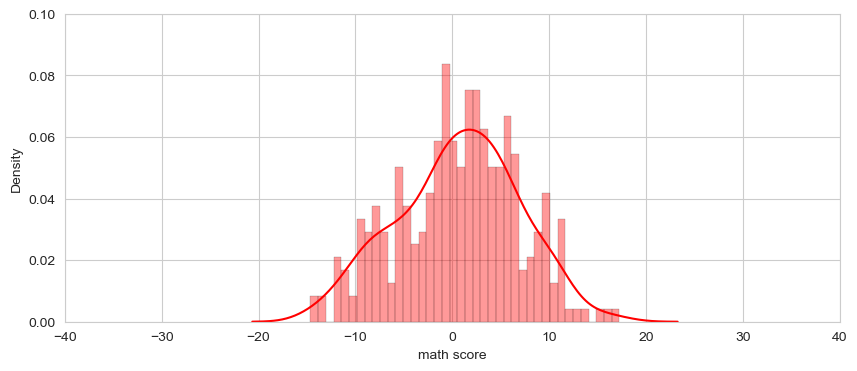

In [136]:
# Plot resíduos
plt.figure(figsize = (10,4))
ax = sns.distplot((y_teste - pred_v5), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.1));

In [137]:
# Modelo 6
modelo_v6 = Ridge(alpha = 1.0)

In [138]:
# Treinamento
modelo_v6.fit(X_treino, y_treino)

Ridge()

In [139]:
print('Coeficientes: \n', modelo_v6.coef_)

Coeficientes: 
 [10.86778001  0.93744164  0.90580146  0.55549573  1.00319017 -0.73625176
  0.56205583 -0.3445942  -1.03989577 -2.83254544  2.83254544 -0.77737432
  0.77737432]


In [140]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v6.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
gender,10.867780
re,0.937442
reading score,0.905801
ple_associate,0.555496
ple_bachelor,1.003190
ple_high school,-0.736252
ple_master,0.562056
ple_some college,-0.344594
ple_some high school,-1.039896
lunch_free/reduced,-2.832545


In [141]:
# Previsões com dados de teste
pred_v6 = modelo_v6.predict(X_teste)
pred_v6[:10]

array([90.70050211, 49.54270927, 86.56315236, 58.38267494, 55.11416031,
       74.70467076, 52.1021146 , 37.87229234, 74.06383003, 68.41816903])

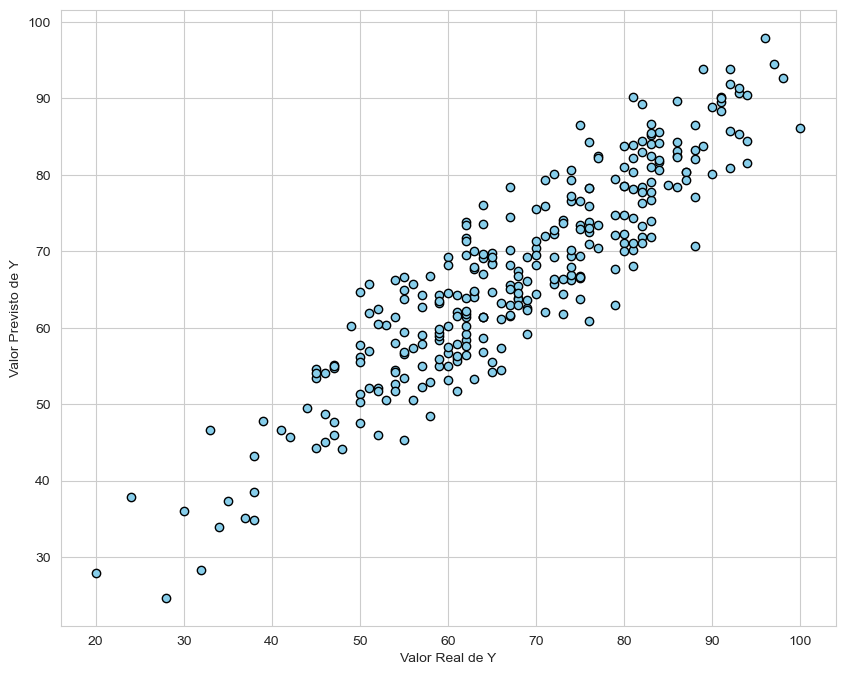

In [142]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v6, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [143]:
# MAE
mean_absolute_error(y_teste, pred_v6)

5.087065203107116

In [144]:
# Inserir o valor de MAE para o modelo_v6 no dataframe
df_modelos.loc['modelo_v6', 'MAE'] = mean_absolute_error(y_teste, pred_v6)

In [145]:
# MSE
mean_squared_error(y_teste, pred_v6)

39.48936204163987

In [146]:
# Inserir o valor de MSE para o modelo_v6 no dataframe
df_modelos.loc['modelo_v6', 'MSE'] = mean_squared_error(y_teste, pred_v6)

In [147]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v6))

6.284056177473262

In [148]:
# Inserir o valor de RMSE para o modelo_v6 no dataframe
df_modelos.loc['modelo_v6', 'RMSE'] = np.sqrt(mean_squared_error(y_teste, pred_v6))

In [149]:
# Coeficiente R2
r2_score(y_teste, pred_v6)

0.8224274632499408

In [150]:
# Inserir o valor de R2 para o modelo_v6 no dataframe
df_modelos.loc['modelo_v6', 'R2'] = r2_score(y_teste, pred_v6)

In [151]:
# Variância Explicada
explained_variance_score(y_teste, pred_v6)

0.8241612427793176

In [152]:
# Inserir o valor de EX_VAR para o modelo_v6 no dataframe
df_modelos.loc['modelo_v6', 'EX_VAR'] = mean_absolute_error(y_teste, pred_v6)

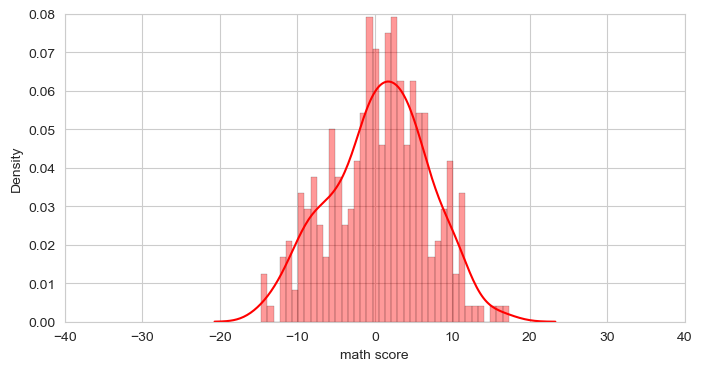

In [153]:
# Plot resíduos
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v6), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.08));

In [154]:
# Modelo 7
modelo_v7 = Lasso(alpha = 1.0)

In [155]:
# Treinamento
modelo_v7.fit(X_treino, y_treino)

Lasso()

In [156]:
print('Coeficientes: \n', modelo_v7.coef_)

Coeficientes: 
 [ 7.11104465e+00  2.57366443e-01  9.12361009e-01  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.33828573e+00  3.66475033e-15 -0.00000000e+00
  0.00000000e+00]


In [157]:
# Coeficientes
df_coef = pd.DataFrame(modelo_v7.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
gender,7.111045e+00
re,2.573664e-01
reading score,9.123610e-01
ple_associate,0.000000e+00
ple_bachelor,0.000000e+00
ple_high school,-0.000000e+00
ple_master,0.000000e+00
ple_some college,-0.000000e+00
ple_some high school,-0.000000e+00
lunch_free/reduced,-1.338286e+00


In [158]:
# Previsões com dados de teste
pred_v7 = modelo_v7.predict(X_teste)
pred_v7[:10]

array([86.29212858, 51.03815434, 81.73032354, 54.49975496, 59.33821159,
       76.22786089, 57.25612313, 42.65834699, 76.67307075, 67.06302437])

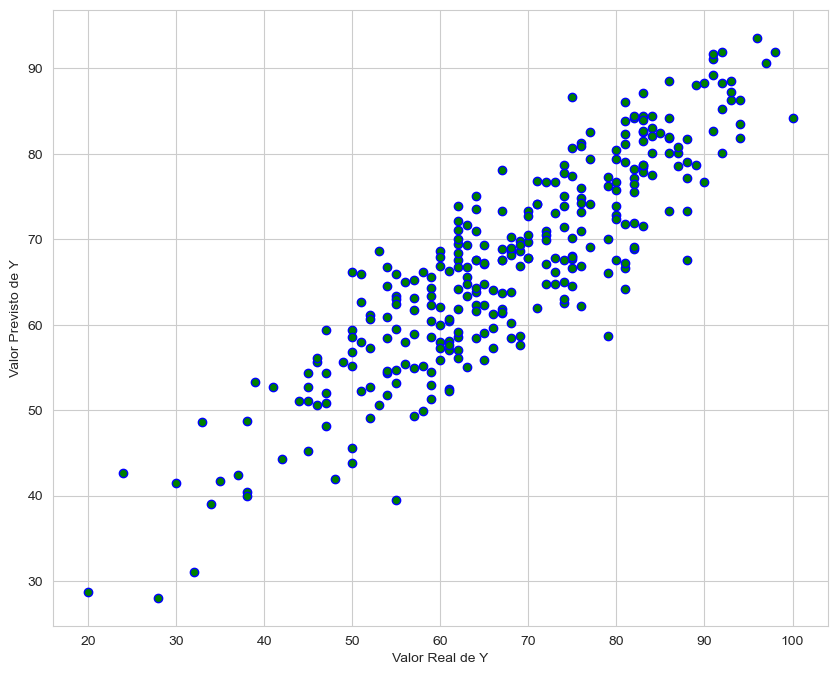

In [159]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v7, color = 'green', edgecolors = 'blue')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [160]:
# MAE
mean_absolute_error(y_teste, pred_v7)

5.628167819113034

In [161]:
# Inserir o valor de MAE para o modelo_v7 no dataframe
df_modelos.loc['modelo_v7', 'MAE'] = mean_absolute_error(y_teste, pred_v7)

In [162]:
# MSE
mean_squared_error(y_teste, pred_v7)

49.26622196643965

In [163]:
# Inserir o valor de MSE para o modelo_v7 no dataframe
df_modelos.loc['modelo_v7', 'MSE'] = mean_squared_error(y_teste, pred_v7)

In [164]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v7))

7.018990095906935

In [165]:
# Inserir o valor de RMSE para o modelo_v7 no dataframe
df_modelos.loc['modelo_v7', 'RMSE'] = np.sqrt(mean_squared_error(y_teste, pred_v7))

In [166]:
# Coeficiente R2
r2_score(y_teste, pred_v7)

0.7784636783585556

In [167]:
# Inserir o valor de R2 para o modelo_v7 no dataframe
df_modelos.loc['modelo_v7', 'R2'] = r2_score(y_teste, pred_v7)

In [168]:
# Variância Explicada
explained_variance_score(y_teste, pred_v7)

0.7802180011554771

In [169]:
# Inserir o valor de EX_VAR para o modelo_v7 no dataframe
df_modelos.loc['modelo_v7', 'EX_VAR'] = mean_absolute_error(y_teste, pred_v7)

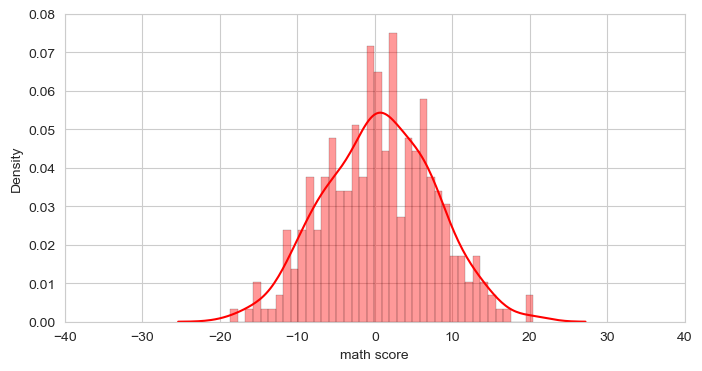

In [170]:
# Plot resíduos
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v7), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.08));

In [171]:
# Treinamento de um modelo de árvore de decisão
modelo_v8 = DecisionTreeRegressor()

In [172]:
modelo_v8.fit(X_treino, y_treino)

DecisionTreeRegressor()

In [173]:
# Previsões com dados de teste
pred_v8 = modelo_v8.predict(X_teste)
pred_v8[:10]

array([95., 48., 98., 45., 64., 65., 61., 39., 69., 66.])

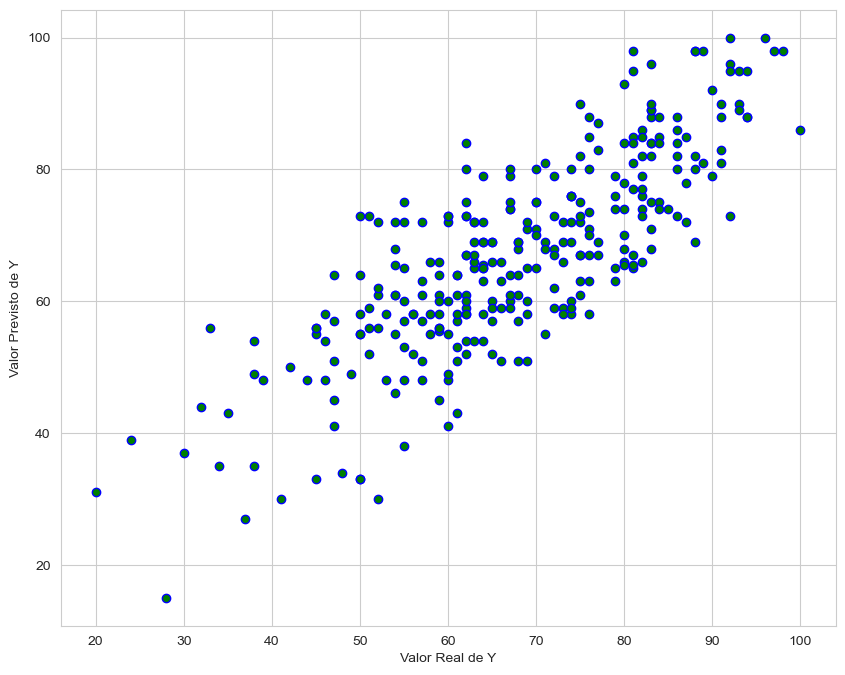

In [174]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v8, color = 'green', edgecolors = 'blue')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [175]:
# MAE
mean_absolute_error(y_teste, pred_v8)

7.596666666666667

In [176]:
# Inserir o valor de MAE para o modelo_v8 no dataframe
df_modelos.loc['modelo_v8', 'MAE'] = mean_absolute_error(y_teste, pred_v8)

In [177]:
# MSE
mean_squared_error(y_teste, pred_v8)

87.15833333333333

In [178]:
# Inserir o valor de MSE para o modelo_v8 no dataframe
df_modelos.loc['modelo_v8', 'MSE'] = mean_squared_error(y_teste, pred_v8)

In [179]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v8))

9.33586275249017

In [180]:
# Inserir o valor de RMSE para o modelo_v8 no dataframe
df_modelos.loc['modelo_v8', 'RMSE'] = np.sqrt(mean_squared_error(y_teste, pred_v8))

In [181]:
# Coeficiente R2
r2_score(y_teste, pred_v8)

0.6080735279393099

In [182]:
# Inserir o valor de R2 para o modelo_v8 no dataframe
df_modelos.loc['modelo_v8', 'R2'] = r2_score(y_teste, pred_v8)

In [183]:
# Variância Explicada
explained_variance_score(y_teste, pred_v8)

0.6096388355777954

In [184]:
# Inserir o valor de EX_VAR para o modelo_v8 no dataframe
df_modelos.loc['modelo_v8', 'EX_VAR'] = mean_absolute_error(y_teste, pred_v8)

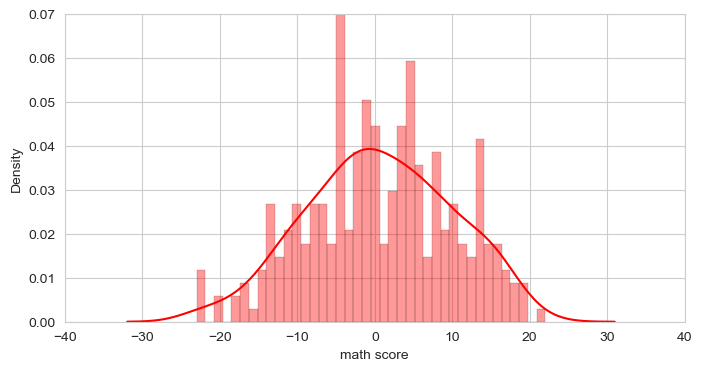

In [185]:
# Plot resíduos
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v8), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.07));

In [186]:
# Visualização de dataframe com valores MAE, MSE, RMSE, R2 e varância explicada de cada modelo
df_modelos

,MAE,MSE,RMSE,R2,EX_VAR
modelo_v1,4.555553,32.239113,5.67795,0.85503,4.555553
modelo_v2,4.555321,32.23896,5.677936,0.85503,4.555321
modelo_v3,5.334103,42.969982,6.555149,0.806776,5.334103
modelo_v4,7.19,78.123333,8.83874,0.648701,7.19
modelo_v5,5.087264,39.47288,6.282745,0.822502,5.087264
modelo_v6,5.087065,39.489362,6.284056,0.822427,5.087065
modelo_v7,5.628168,49.266222,7.01899,0.778464,5.628168
modelo_v8,7.596667,87.158333,9.335863,0.608074,7.596667


In [187]:
# Visualização ordenada por maior valor de R2
df_modelos = df_modelos.sort_values("R2", ascending = False)
df_modelos

,MAE,MSE,RMSE,R2,EX_VAR
modelo_v2,4.555321,32.23896,5.677936,0.85503,4.555321
modelo_v1,4.555553,32.239113,5.67795,0.85503,4.555553
modelo_v5,5.087264,39.47288,6.282745,0.822502,5.087264
modelo_v6,5.087065,39.489362,6.284056,0.822427,5.087065
modelo_v3,5.334103,42.969982,6.555149,0.806776,5.334103
modelo_v7,5.628168,49.266222,7.01899,0.778464,5.628168
modelo_v4,7.19,78.123333,8.83874,0.648701,7.19
modelo_v8,7.596667,87.158333,9.335863,0.608074,7.596667
